In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pprint
from tqdm import tqdm
%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['font.size'] = 20

In [5]:
from profiler import profile, OutputType
from u_net import UNet, GradientType
from memory_consumption import peak_memory

def total_memory_MB(profiler_output):
    return sum([v for k,v in profiler_output.items()]) / 1e6

def total_memory_GB(profiler_output):
    return sum([v for k,v in profiler_output.items()]) / 1e9

def plot(results, xlabel, ylabel='Memory [GB]', title='', legend=True, xticks=None):
    for k, v in results.items():
        plt.scatter(x, v, label=k)
        plt.plot(x, v)

    if legend:
        plt.legend()
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    if xticks:
        plt.xticks(xticks)
    plt.title(title)

### Train Peak Memory vs Batch Size

In [8]:
x = range(1,9)
results = {'ADAM': [], 'GRADIENTS_MEMORY': [] }
for batch_size in tqdm(x):
    results['ADAM'].append(
        total_memory_GB(peak_memory(UNet(), batch_size=batch_size)))
    results['GRADIENTS_MEMORY'].append(
        total_memory_GB(peak_memory(UNet(gradient_type=GradientType.GRADIENTS_MEMORY), batch_size=batch_size)))
pprint.pprint(results)

100%|██████████| 8/8 [20:39<00:00, 154.89s/it]

{'ADAM': [2.09322666,
          2.784404132,
          3.475581604,
          4.166759076,
          4.857936548,
          5.54911402,
          6.240291492,
          6.931468964],
 'GRADIENTS_MEMORY': [1.764104244,
                      2.126159924,
                      2.52010038,
                      3.118871068,
                      3.717641756,
                      4.316412444,
                      4.915183132,
                      5.51395382]}


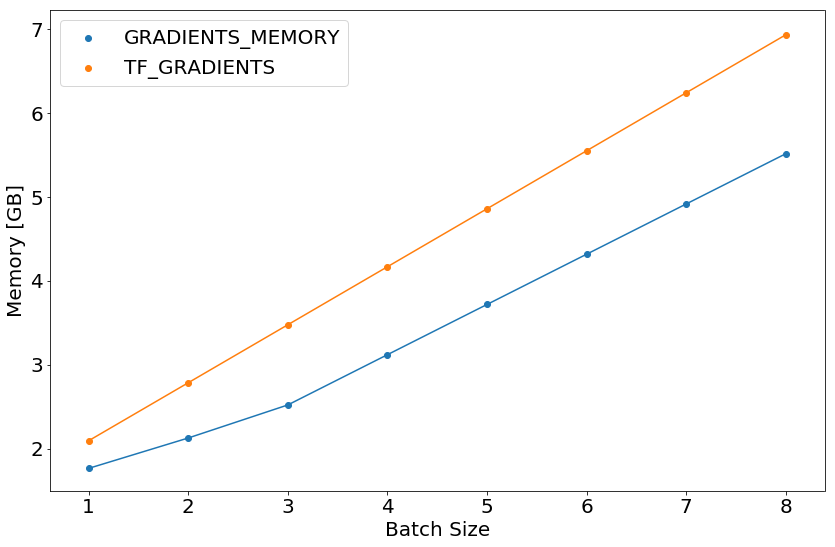

In [16]:
plot(results, 'Batch Size', xticks=x)
plt.tight_layout()
plt.savefig('../../assets/profiling-tf-models/memory_batchsize.png')

In [17]:
x = range(1,9)
results = {'BASELINE': [], 'BATCH_NORM': [] }
for batch_size in tqdm(x):
    results['BASELINE'].append(
        total_memory_GB(peak_memory(UNet(), batch_size=batch_size)))
    results['BATCH_NORM'].append(
        total_memory_GB(peak_memory(UNet(batch_norm=True), batch_size=batch_size)))
pprint.pprint(results)

100%|██████████| 8/8 [21:57<00:00, 164.69s/it]

{'BASELINE': [2.09322666,
              2.784404132,
              3.475581604,
              4.166759076,
              4.857936548,
              5.54911402,
              6.240291492,
              6.931468964],
 'BATCH_NORM': [2.856105636,
                4.310116004,
                5.764126372,
                7.21813674,
                8.672147108,
                10.126157476,
                11.580167844,
                13.034178212]}


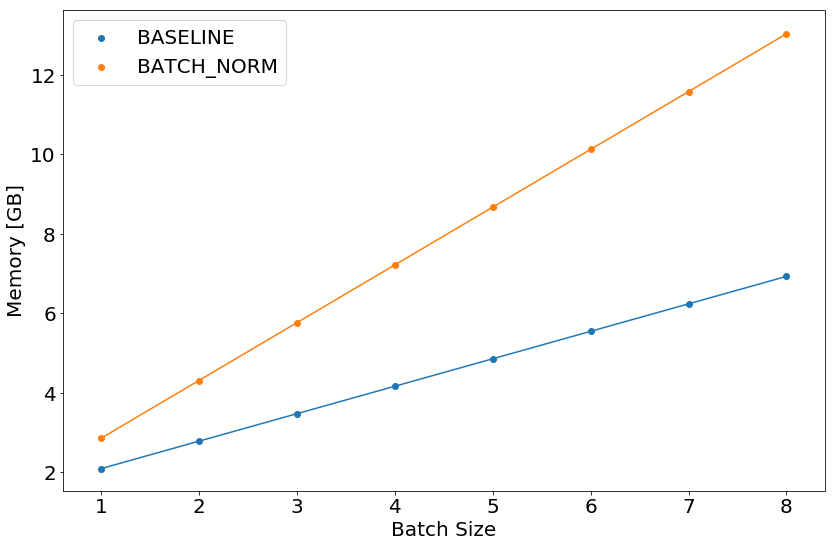

In [18]:
plot(results, 'Batch Size', xticks=x)
plt.tight_layout()
plt.savefig('../../assets/profiling-tf-models/bn_nobn.png')

### Memory vs n_conv

In [9]:
n_convs = range(1,5)
print(total_memory_MB(profile(n_conv=2)))

GradientType.PLAIN_ADAM
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


75.057428


In [21]:
x = range(1,5)
results = {t.value: [] for t in GradientType }
for n_conv in x:
    for t in GradientType:
        results[t.value].append(total_memory_MB(profile(n_conv=n_conv, gradient_type=t)))
pprint.pprint(results)

GradientType.PLAIN_ADAM
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.TF_GRADIENTS
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.TF_GRADIENTS_EXPERIMENTAL_ACCUMULATE_N
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.GRADIENTS_MEMORY
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.GRADIENTS_COLLECTION
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/right0/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 32) and () are not compatible.
Node train/model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.ADAM_COMPUTE_GRADIENTS
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.PLAIN_ADAM
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.TF_GRADIENTS
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.TF_GRADIENTS_EXPERIMENTAL_ACCUMULATE_N
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.GRADIENTS_MEMORY
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/right0/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 32) and () are not compatible.
Node train/model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.GRADIENTS_COLLECTION
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/right0/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 32) and () are not compatible.
Node train/model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/left0/conv1/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.ADAM_COMPUTE_GRADIENTS
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.PLAIN_ADAM
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.TF_GRADIENTS
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.TF_GRADIENTS_EXPERIMENTAL_ACCUMULATE_N
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.GRADIENTS_MEMORY
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/right0/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 32) and () are not compatible.
Node train/model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.GRADIENTS_COLLECTION
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/right0/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 32) and () are not compatible.
Node train/model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/left0/conv1/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.ADAM_COMPUTE_GRADIENTS
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.PLAIN_ADAM
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.TF_GRADIENTS
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.TF_GRADIENTS_EXPERIMENTAL_ACCUMULATE_N
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.GRADIENTS_MEMORY
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/right0/conv2/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/left0/conv1/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.GRADIENTS_COLLECTION
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/right0/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 32) and () are not compatible.
Node train/model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/left0/conv1/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.ADAM_COMPUTE_GRADIENTS
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


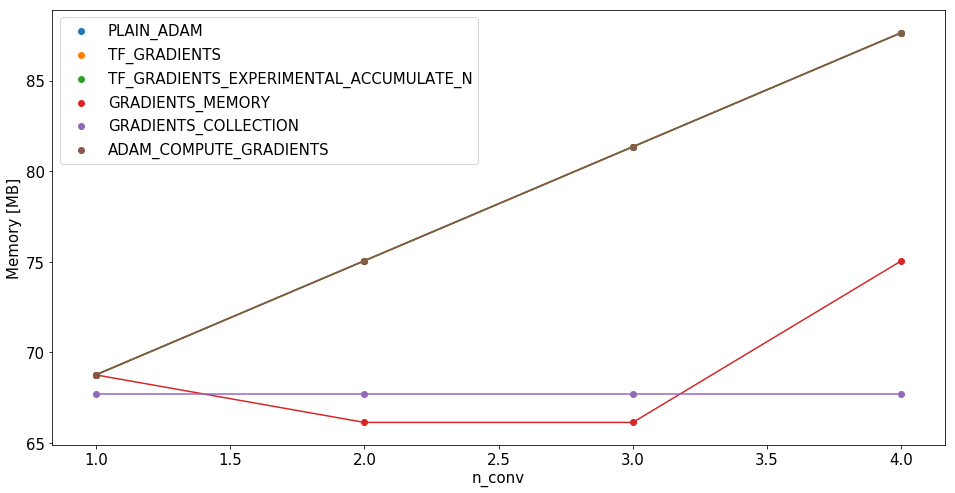

In [35]:
plot(results, 'n_conv')

### Memory vs filters

In [36]:
x = [2, 4, 16, 32, 64]
results = {t.value: [] for t in GradientType }
for value in x:
    for t in GradientType:
        results[t.value].append(total_memory_MB(profile(filters=value, gradient_type=t)))
pprint.pprint(results)

GradientType.PLAIN_ADAM
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 2) and () are not compatible.


GradientType.TF_GRADIENTS
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 2) and () are not compatible.


GradientType.TF_GRADIENTS_EXPERIMENTAL_ACCUMULATE_N
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 2) and () are not compatible.


GradientType.GRADIENTS_MEMORY
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 2) and () are not compatible.
Node train/model/right0/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 4) and () are not compatible.
Node train/model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 2) and () are not compatible.


GradientType.GRADIENTS_COLLECTION
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 2) and () are not compatible.
Node train/model/right0/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 4) and () are not compatible.
Node train/model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 2) and () are not compatible.
Node train/model/left0/conv1/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 2) and () are not compatible.


GradientType.ADAM_COMPUTE_GRADIENTS
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 2) and () are not compatible.


GradientType.PLAIN_ADAM
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 4) and () are not compatible.


GradientType.TF_GRADIENTS
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 4) and () are not compatible.


GradientType.TF_GRADIENTS_EXPERIMENTAL_ACCUMULATE_N
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 4) and () are not compatible.


GradientType.GRADIENTS_MEMORY
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 4) and () are not compatible.
Node train/model/right0/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 8) and () are not compatible.
Node train/model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 4) and () are not compatible.


GradientType.GRADIENTS_COLLECTION
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 4) and () are not compatible.
Node train/model/right0/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 8) and () are not compatible.
Node train/model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 4) and () are not compatible.
Node train/model/left0/conv1/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 4) and () are not compatible.


GradientType.ADAM_COMPUTE_GRADIENTS
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 4) and () are not compatible.


GradientType.PLAIN_ADAM
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.TF_GRADIENTS
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.TF_GRADIENTS_EXPERIMENTAL_ACCUMULATE_N
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.GRADIENTS_MEMORY
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/right0/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 32) and () are not compatible.
Node train/model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.GRADIENTS_COLLECTION
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/right0/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 32) and () are not compatible.
Node train/model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/left0/conv1/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.ADAM_COMPUTE_GRADIENTS
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.PLAIN_ADAM
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 32) and () are not compatible.


GradientType.TF_GRADIENTS
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 32) and () are not compatible.


GradientType.TF_GRADIENTS_EXPERIMENTAL_ACCUMULATE_N
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 32) and () are not compatible.


GradientType.GRADIENTS_MEMORY
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 32) and () are not compatible.
Node train/model/right0/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 64) and () are not compatible.
Node train/model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 32) and () are not compatible.


GradientType.GRADIENTS_COLLECTION
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 32) and () are not compatible.
Node train/model/right0/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 64) and () are not compatible.
Node train/model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 32) and () are not compatible.
Node train/model/left0/conv1/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 32) and () are not compatible.


GradientType.ADAM_COMPUTE_GRADIENTS
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 32) and () are not compatible.


GradientType.PLAIN_ADAM
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 64) and () are not compatible.


GradientType.TF_GRADIENTS
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 64) and () are not compatible.


GradientType.TF_GRADIENTS_EXPERIMENTAL_ACCUMULATE_N
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 64) and () are not compatible.


GradientType.GRADIENTS_MEMORY
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 64) and () are not compatible.
Node train/model/right0/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 128) and () are not compatible.
Node train/model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 64) and () are not compatible.


GradientType.GRADIENTS_COLLECTION
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 64) and () are not compatible.
Node train/model/right0/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 128) and () are not compatible.
Node train/model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 64) and () are not compatible.
Node train/model/left0/conv1/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 64) and () are not compatible.


GradientType.ADAM_COMPUTE_GRADIENTS
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 64) and () are not compatible.


{'ADAM_COMPUTE_GRADIENTS': [35.390004,
                            42.40322,
                            75.057428,
                            112.337172,
                            224.755988],
 'GRADIENTS_COLLECTION': [34.472346,
                          40.568058,
                          67.717242,
                          97.656954,
                          195.395706],
 'GRADIENTS_MEMORY': [34.275674, 40.174778, 66.144314, 94.511162, 189.104186],
 'PLAIN_ADAM': [35.390004, 42.40322, 75.057428, 112.337172, 224.755988],
 'TF_GRADIENTS': [35.390004, 42.40322, 75.057428, 112.337172, 224.755988],
 'TF_GRADIENTS_EXPERIMENTAL_ACCUMULATE_N': [35.390004,
                                            42.40322,
                                            75.057428,
                                            112.337172,
                                            224.755988]}


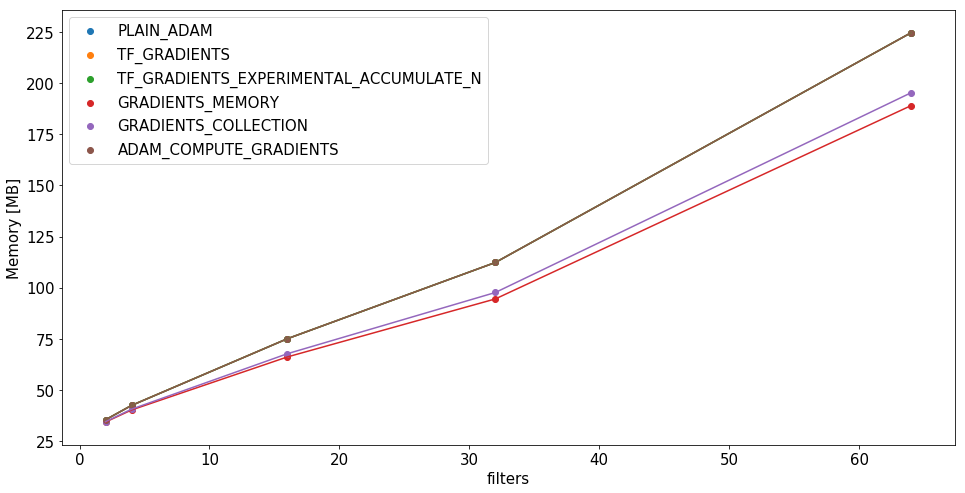

In [37]:
plot(results, xlabel='filters')

### Memory vs batch_size

In [39]:
x = [1, 2, 4, 8, 16, 32]
results = {t.value: [] for t in GradientType }
for value in x:
    for t in GradientType:
        results[t.value].append(total_memory_MB(profile(batch_size=value, gradient_type=t)))
pprint.pprint(results)

GradientType.PLAIN_ADAM
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.TF_GRADIENTS
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.TF_GRADIENTS_EXPERIMENTAL_ACCUMULATE_N
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.GRADIENTS_MEMORY
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/right0/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 32) and () are not compatible.
Node train/model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.GRADIENTS_COLLECTION
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/right0/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 32) and () are not compatible.
Node train/model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/left0/conv1/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.ADAM_COMPUTE_GRADIENTS
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.PLAIN_ADAM
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.TF_GRADIENTS
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.TF_GRADIENTS_EXPERIMENTAL_ACCUMULATE_N
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.GRADIENTS_MEMORY
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/right0/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 32) and () are not compatible.
Node train/model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.GRADIENTS_COLLECTION
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/right0/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 32) and () are not compatible.
Node train/model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/left0/conv1/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.ADAM_COMPUTE_GRADIENTS
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.PLAIN_ADAM
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.TF_GRADIENTS
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.TF_GRADIENTS_EXPERIMENTAL_ACCUMULATE_N
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.GRADIENTS_MEMORY
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/right0/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 32) and () are not compatible.
Node train/model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.GRADIENTS_COLLECTION
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/right0/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 32) and () are not compatible.
Node train/model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/left0/conv1/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.ADAM_COMPUTE_GRADIENTS
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.PLAIN_ADAM
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.TF_GRADIENTS
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.TF_GRADIENTS_EXPERIMENTAL_ACCUMULATE_N
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.GRADIENTS_MEMORY
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/right0/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 32) and () are not compatible.
Node train/model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.GRADIENTS_COLLECTION
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/right0/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 32) and () are not compatible.
Node train/model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/left0/conv1/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.ADAM_COMPUTE_GRADIENTS
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.PLAIN_ADAM
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.TF_GRADIENTS
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.TF_GRADIENTS_EXPERIMENTAL_ACCUMULATE_N
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.GRADIENTS_MEMORY
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/right0/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 32) and () are not compatible.
Node train/model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.GRADIENTS_COLLECTION
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/right0/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 32) and () are not compatible.
Node train/model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/left0/conv1/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.ADAM_COMPUTE_GRADIENTS
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.PLAIN_ADAM
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.TF_GRADIENTS
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.TF_GRADIENTS_EXPERIMENTAL_ACCUMULATE_N
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.GRADIENTS_MEMORY
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/right0/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 32) and () are not compatible.
Node train/model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.GRADIENTS_COLLECTION
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/right0/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 32) and () are not compatible.
Node train/model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/left0/conv1/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.ADAM_COMPUTE_GRADIENTS
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


{'ADAM_COMPUTE_GRADIENTS': [75.057428,
                            93.473028,
                            143.39322,
                            230.162884,
                            403.702212,
                            750.780868],
 'GRADIENTS_COLLECTION': [67.717242,
                          85.328184,
                          114.032952,
                          171.442488,
                          286.26156,
                          515.899704],
 'GRADIENTS_MEMORY': [66.144314,
                      75.64703,
                      94.65247,
                      138.94564,
                      240.133224,
                      442.508392],
 'PLAIN_ADAM': [75.057428,
                93.473028,
                143.39322,
                230.162884,
                403.702212,
                750.780868],
 'TF_GRADIENTS': [75.057428,
                  93.473028,
                  143.39322,
                  230.162884,
                  403.702212,
                  750.78

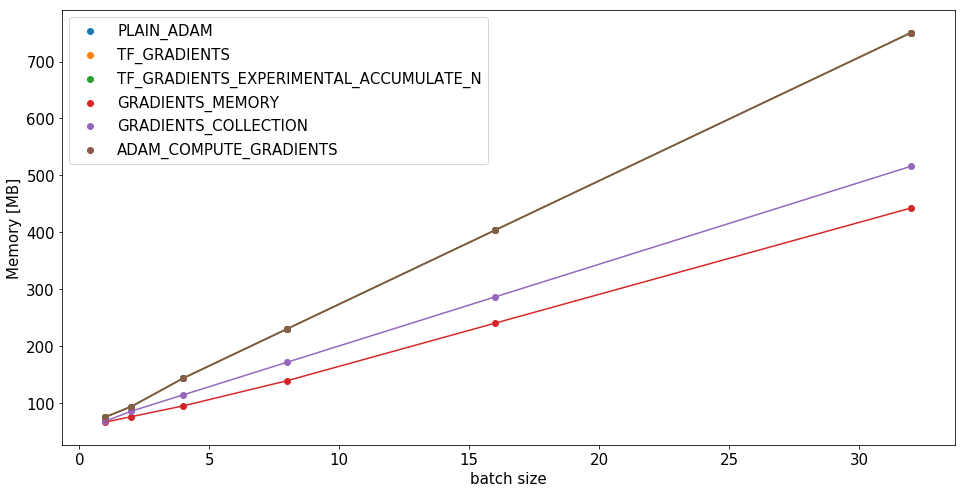

In [40]:
plot(results, xlabel='batch size')

### Memory vs batch_size (drop, bn, drop+bn) PLAIN_ADAM

In [47]:
x = [1, 2, 4, 8, 16, 32]
results = {
    'baseline': [],
    'dropout': [],
    'batch_norm': [],
    'dropout+batch_norm': []
}
for value in x:
    results['baseline'].append(total_memory_MB(profile(batch_size=value)))
    results['dropout'].append(total_memory_MB(profile(batch_size=value, dropout=0.5)))
    results['batch_norm'].append(total_memory_MB(profile(batch_size=value, batch_norm=True)))
    results['dropout+batch_norm'].append(total_memory_MB(profile(batch_size=value, dropout=0.5, batch_norm=True)))
pprint.pprint(results)

GradientType.PLAIN_ADAM
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.PLAIN_ADAM
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.PLAIN_ADAM
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.PLAIN_ADAM
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.PLAIN_ADAM
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.PLAIN_ADAM
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.PLAIN_ADAM
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.PLAIN_ADAM
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.PLAIN_ADAM
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.PLAIN_ADAM
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.PLAIN_ADAM
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.PLAIN_ADAM
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.PLAIN_ADAM
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.PLAIN_ADAM
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.PLAIN_ADAM
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.PLAIN_ADAM
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.PLAIN_ADAM
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.PLAIN_ADAM
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.PLAIN_ADAM
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.PLAIN_ADAM
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.PLAIN_ADAM
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.PLAIN_ADAM
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.PLAIN_ADAM
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.PLAIN_ADAM
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


{'baseline': [75.057428,
              100.008388,
              143.39322,
              230.162884,
              403.702212,
              750.780868],
 'batch_norm': [81.349652,
                120.980932,
                185.337284,
                314.049988,
                571.475396,
                1086.326212],
 'dropout': [75.057428,
             93.473028,
             143.39322,
             230.162884,
             403.702212,
             750.780868],
 'dropout+batch_norm': [81.349652,
                        120.980932,
                        185.337284,
                        314.049988,
                        571.475396,
                        1086.326212]}


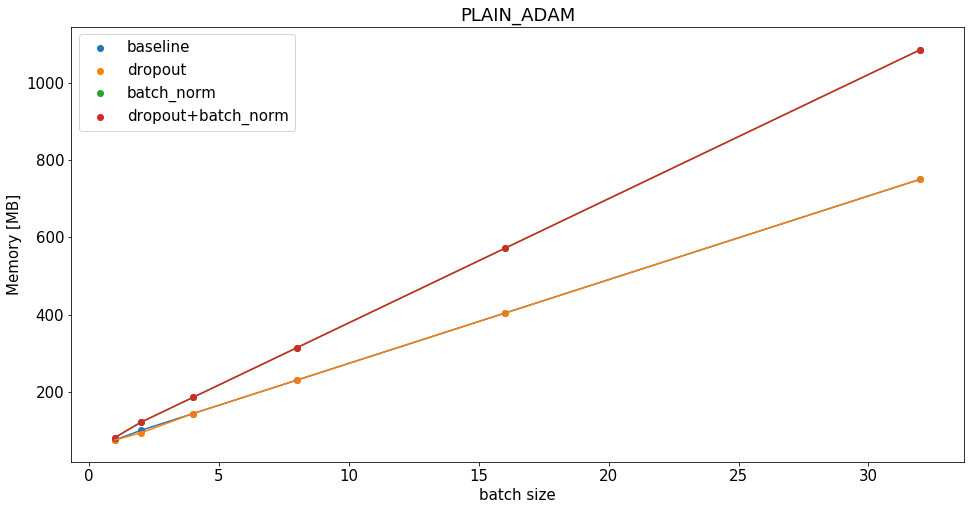

In [48]:
plot(results, xlabel='batch size', title='PLAIN_ADAM')

### Memory vs batch_size (drop, bn, drop+bn) MEMORY_GRADIENTS

In [43]:
x = [1, 2, 4, 8, 16, 32]
results = {
    'baseline': [],
    'dropout': [],
    'batch_norm': [],
    'dropout+batch_norm': []
}
for value in x:
    results['baseline'].append(total_memory_MB(profile(batch_size=value, gradient_type=GradientType.GRADIENTS_MEMORY)))
    results['dropout'].append(total_memory_MB(profile(batch_size=value, dropout=0.5, gradient_type=GradientType.GRADIENTS_MEMORY)))
    results['batch_norm'].append(total_memory_MB(profile(batch_size=value, batch_norm=True, gradient_type=GradientType.GRADIENTS_MEMORY)))
    results['dropout+batch_norm'].append(total_memory_MB(profile(batch_size=value, dropout=0.5, batch_norm=True, gradient_type=GradientType.GRADIENTS_MEMORY)))
pprint.pprint(results)

GradientType.GRADIENTS_MEMORY
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/right0/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 32) and () are not compatible.
Node train/model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.GRADIENTS_MEMORY
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/right0/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 32) and () are not compatible.
Node train/model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.GRADIENTS_MEMORY
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/right0/conv1/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/left0/conv1/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.GRADIENTS_MEMORY
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/right0/conv1/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/left0/conv1/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.GRADIENTS_MEMORY
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/right0/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 32) and () are not compatible.
Node train/model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.GRADIENTS_MEMORY
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/right0/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 32) and () are not compatible.
Node train/model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.GRADIENTS_MEMORY
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/right0/conv1/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/left0/conv1/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.GRADIENTS_MEMORY
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/right0/conv1/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/left0/conv1/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.GRADIENTS_MEMORY
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/right0/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 32) and () are not compatible.
Node train/model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.GRADIENTS_MEMORY
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/right0/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 32) and () are not compatible.
Node train/model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.GRADIENTS_MEMORY
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/right0/conv1/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/left0/conv1/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.GRADIENTS_MEMORY
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/right0/conv1/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/left0/conv1/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.GRADIENTS_MEMORY
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/right0/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 32) and () are not compatible.
Node train/model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.GRADIENTS_MEMORY
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/right0/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 32) and () are not compatible.
Node train/model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.GRADIENTS_MEMORY
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/right0/conv1/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/left0/conv1/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.GRADIENTS_MEMORY
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/right0/conv1/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/left0/conv1/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.GRADIENTS_MEMORY
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/right0/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 32) and () are not compatible.
Node train/model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.GRADIENTS_MEMORY
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/right0/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 32) and () are not compatible.
Node train/model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.GRADIENTS_MEMORY
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/right0/conv1/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/left0/conv1/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.GRADIENTS_MEMORY
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/right0/conv1/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/left0/conv1/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.GRADIENTS_MEMORY
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/right0/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 32) and () are not compatible.
Node train/model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.GRADIENTS_MEMORY
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/right0/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 32) and () are not compatible.
Node train/model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.GRADIENTS_MEMORY
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/right0/conv1/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/left0/conv1/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


GradientType.GRADIENTS_MEMORY
DISABLE OPTIMIZER: FALSE


Node model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/right0/conv1/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/level1/conv0/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.
Node train/model/left0/conv1/dropout/cond/dropout/random_uniform incompatible shapes: Shapes (?, ?, ?, 16) and () are not compatible.


{'baseline': [66.144314, 75.64703, 94.65247, 138.94564, 240.133224, 442.508392],
 'batch_norm': [72.961258,
                89.27971,
                121.916638,
                187.190494,
                317.738206,
                578.83363],
 'dropout': [66.144314, 75.64703, 94.65247, 138.94564, 240.133224, 442.508392],
 'dropout+batch_norm': [72.961258,
                        89.27971,
                        121.916638,
                        187.190494,
                        317.738206,
                        578.83363]}


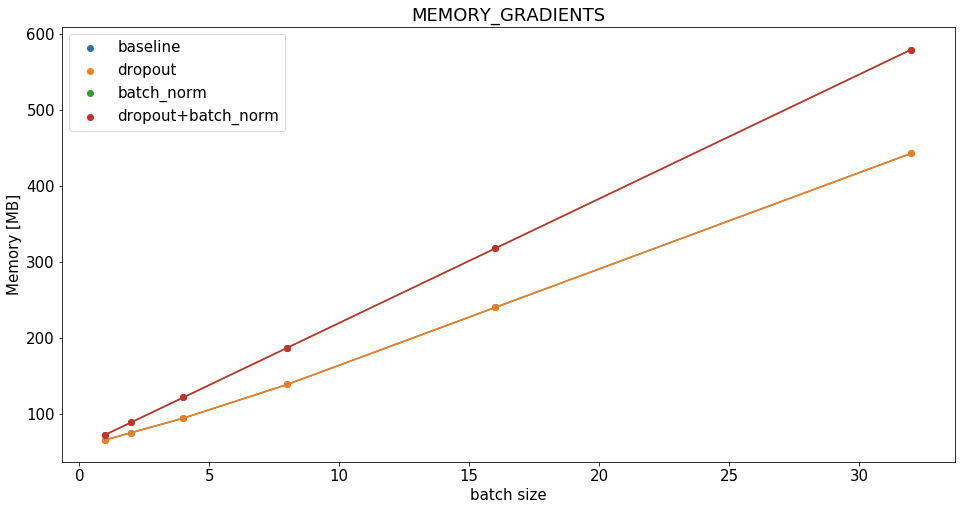

In [46]:
plot(results, xlabel='batch size', title='MEMORY_GRADIENTS')

### Most memory expensive operation

In [29]:
profile(output_type=OutputType.FILE)

{'model': {'total_parameters': 100994, 'total_peak_bytes': 19529772},
 'total': {'total_parameters': 302984, 'total_peak_bytes': 362556406},
 'train': {'total_parameters': 201990, 'total_peak_bytes': 343026634}}